In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt

from itertools import combinations, groupby


In [2]:
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               draw: bool = False) -> list[tuple[int, int]]:
    """
    Generates a random undirected graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted
    """

    edges = combinations(range(num_of_nodes), 2)
    G = nx.Graph()
    G.add_nodes_from(range(num_of_nodes))

    for _, node_edges in groupby(edges, key=lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)

    for (u, v, w) in G.edges(data=True):
        w['weight'] = random.randint(0, 10)

    if draw:
        plt.figure(figsize=(10, 6))
        nx.draw(G, node_color='lightblue',
                with_labels=True,
                node_size=500)

    return G


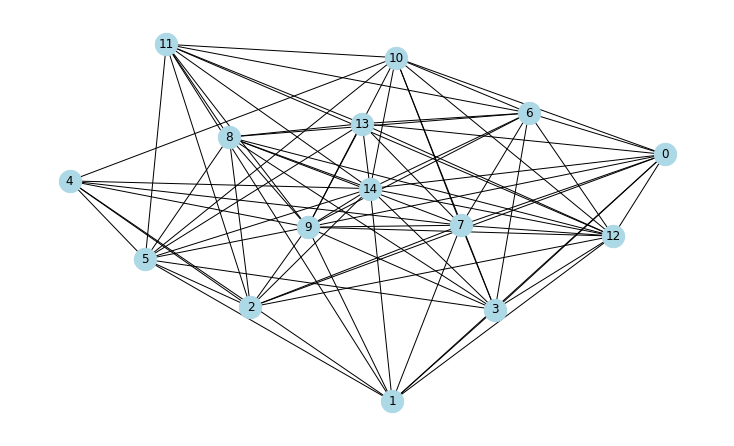

In [280]:
G = gnp_random_connected_graph(15, 0.6, True)


In [281]:
from networkx.algorithms import tree


In [282]:
mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")


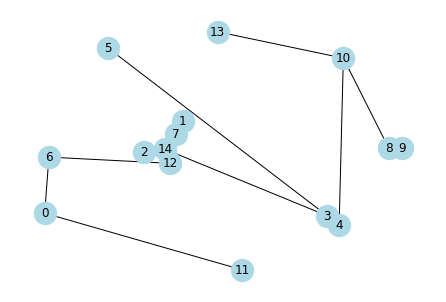

In [212]:
nx.draw(mstk, node_color='lightblue',
        with_labels=True,
        node_size=500)


In [283]:
mstk.edges(), len(mstk.edges())
weig = 0
for u,v,w in mstk.edges(data=True):
    print(w['weight'])
    weig+=w['weight']
weig

0
0
1
2
5
0
0
0
1
1
3
1
0
0


14

In [9]:
mstp = tree.minimum_spanning_tree(G, algorithm="prim")


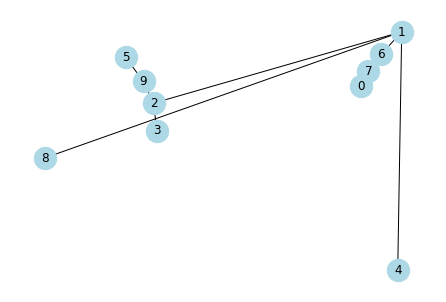

In [10]:
nx.draw(mstp, node_color='lightblue',
        with_labels=True,
        node_size=500)


In [232]:
mstp.edges(), len(mstp.edges())


(EdgeView([(0, 7), (1, 6), (1, 4), (1, 2), (1, 8), (2, 3), (2, 9), (5, 9), (6, 7)]),
 9)

## How to get list of edges for your algorithm

In [233]:
G.edges.data()


EdgeDataView([(0, 12, {'weight': 7}), (0, 1, {'weight': 10}), (0, 3, {'weight': 9}), (0, 4, {'weight': 2}), (0, 5, {'weight': 8}), (0, 9, {'weight': 4}), (0, 11, {'weight': 4}), (1, 12, {'weight': 1}), (1, 2, {'weight': 8}), (1, 4, {'weight': 3}), (1, 5, {'weight': 3}), (1, 9, {'weight': 3}), (1, 10, {'weight': 5}), (1, 13, {'weight': 10}), (1, 14, {'weight': 6}), (2, 13, {'weight': 2}), (2, 4, {'weight': 7}), (2, 5, {'weight': 3}), (2, 6, {'weight': 3}), (2, 7, {'weight': 6}), (2, 10, {'weight': 1}), (3, 10, {'weight': 3}), (3, 4, {'weight': 9}), (3, 5, {'weight': 4}), (3, 6, {'weight': 3}), (3, 11, {'weight': 10}), (3, 12, {'weight': 6}), (3, 14, {'weight': 9}), (4, 10, {'weight': 8}), (4, 5, {'weight': 4}), (4, 6, {'weight': 8}), (4, 7, {'weight': 4}), (4, 8, {'weight': 8}), (4, 11, {'weight': 3}), (4, 13, {'weight': 7}), (4, 14, {'weight': 9}), (5, 7, {'weight': 10}), (5, 8, {'weight': 4}), (5, 9, {'weight': 2}), (5, 10, {'weight': 6}), (5, 12, {'weight': 8}), (5, 13, {'weight': 7}

In [234]:
edges = list(map(lambda x: (x[0], x[1], x[2]['weight']), G.edges.data()))
nodes = list(G.nodes)


In [235]:
edges[:5]
edges.sort(key=lambda x: x[2])
nodes
graph = (nodes, edges)


In [3]:
def kruskal(graph):
    edges = graph[1]
    nodes = graph[0]
    components = [set(node) for node in list(map(lambda x: [x],nodes))]
    print(components)
    tree = []
    edges.sort(key=lambda x: x[2])
    component1 = 0
    component2 = 1
    for edge in edges:
        component1 = component2 = set()
        for component in components:
            if edge[0] in component:
                component1 = component
            elif edge[1] in component:
                component2 = component
        if component1 != component2 and component1!=set() and component2!=set():
            component1.update(component2)
            components.remove(component2)
            tree.append(edge)
        if len(tree) == len(nodes) - 1:
            break
    return tree


In [309]:
def prim(graph):
    edges = graph[1]
    nodes = graph[0]
    adj_list = {i : 0 for i in nodes}
    tree = []
    connected = {nodes[0]}
    while len(connected) != len(nodes):
        closest_edges = []
        for edge in edges:
            if (edge[0] in connected and edge[1] not in connected) or (edge[1] in connected and edge[0] not in connected):
                closest_edges.append(edge)
        closest_edge = sorted(closest_edges,key = lambda x: x[2])[0]
        tree.append(closest_edge)
        connected.add(closest_edge[0])
        connected.add(closest_edge[1])
    return tree


In [301]:
edges = list(map(lambda x: (x[0], x[1], x[2]['weight']), G.edges.data()))
nodes = list(G.nodes)
my_graph = (nodes, edges)
kruskal(my_graph)

# [(0, 1), (0, 4), (1, 7), (1, 5), (2, 6), (2, 5), (3, 6), (7, 9), (7, 8)]


[{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}, {10}, {11}, {12}, {13}, {14}]


[(0, 1, 0),
 (0, 3, 0),
 (1, 4, 0),
 (1, 11, 0),
 (3, 9, 0),
 (9, 14, 0),
 (11, 12, 0),
 (0, 10, 1),
 (5, 10, 1),
 (6, 14, 1),
 (8, 12, 1),
 (0, 2, 2),
 (7, 8, 3),
 (0, 13, 5)]

In [310]:
edges = list(map(lambda x: (x[0], x[1], x[2]['weight']), G.edges.data()))
nodes = list(G.nodes)
my_graph = (nodes, edges)
prim(my_graph)

[(0, 1, 0),
 (0, 3, 0),
 (1, 4, 0),
 (1, 11, 0),
 (3, 9, 0),
 (9, 14, 0),
 (11, 12, 0),
 (0, 10, 1),
 (5, 10, 1),
 (6, 14, 1),
 (8, 12, 1),
 (0, 2, 2),
 (7, 8, 3),
 (0, 13, 5)]

In [4]:
import time
from tqdm import tqdm

In [ ]:
NUM_OF_ITERATIONS = 1000

time_taken = 0
for i in tqdm(range(NUM_OF_ITERATIONS)):

    # note that we should not measure time of graph creation
    G = gnp_random_connected_graph(50, 0.3, False)
    edges = list(map(lambda x: (x[0], x[1], x[2]['weight']), G.edges.data()))
    nodes = list(G.nodes)
    my_graph = (nodes, edges)
    start = time.time()
    kruskal(my_graph)
    end = time.time()

    time_taken += end - start

time_taken / NUM_OF_ITERATIONS

## Example on time measuring

Read more on this: https://realpython.com/python-timer/

Recall that you should measure times for 5, 10, 20, 50, 100, 200, 500 nodes 1000 times (and take mean of time taken for each node amount).

Then you should build the plot for two algorithms (x - data size, y - mean time of execution).

In [15]:
import time
from tqdm import tqdm


In [16]:
NUM_OF_ITERATIONS = 1000


In [317]:
time_taken = 0
for i in tqdm(range(NUM_OF_ITERATIONS)):

    # note that we should not measure time of graph creation
    G = gnp_random_connected_graph(100, 0.3, False)

    start = time.time()
    tree.minimum_spanning_tree(G, algorithm="kruskal")
    end = time.time()

    time_taken += end - start

time_taken / NUM_OF_ITERATIONS


100%|██████████| 1000/1000 [00:35<00:00, 28.02it/s]


0.015280359983444214